<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework_Adaptive_Integration_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adaptive Integration

Consider the integral:

$
E\left(x\right) = \int_0^x e^{-t^2}dt
$

There is no known way to perform this integral analytically, so numerical approaches are the only way to solve it.  

##A. 

Consider the function 
$
E\left(x=2\right) = \int_0^2 e^{-t^2}dt
$

Write a program that computes this integral with both the adaptive trapezoidal rule and the adaptive Simpson's rule to an accuracy of $10^{-8}$.  Make a log/log plot of the number of slices on the x-axis and the accuracy on the y-axis.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables for the start and end of the integration bounds, along with the specified tolerance and number of slices in iteration 1.

In [ ]:
a = 0.0
b = 2.0
tolerance = 1.0e-8
N_init = 10

Function to be calculated

In [ ]:
def f(x):
  return np.exp(-1*x**2)

First do the iterative trapezoidal rule.  For plotting purposes I'm saving the intergation value, tolerance, and number of slices in an array.

In [ ]:
I_trap = np.array([0.0]) #Array of integral estimates.  Set the 0th estimate to 0
N_trap = [N_init/2] # Array of slices.  Set the 0th estimate to N_init/2 so that it gets doubled to N_init on first round

tol_trap = [10*tolerance] #tolerance array.  The 0th value doesn't matter as long as its greater than the required tolerance
i = 0 #iteration number
while tol_trap[i]>tolerance:  #run for as long as the tolerance in an iteration is greater than the tolerance required
  i += 1  #update the iteration number
  N_trap.append(int(N_trap[i-1]*2)) #Append to your N array the number of slices for this iteration, being twice what you have in the previous iteration
  h=(b-a) / N_trap[i]  #find the spacing
  x = np.linspace(a,b,N_trap[i]+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
  y = f(x) #y values for x points
  int_estimate = h*0.5*(y[0]+y[-1]) #The next few lines calculate the integral using the trapazoidal rule
  for j in range(1,N_trap[i]):
    int_estimate += h * y[j]
  I_trap=np.append(I_trap,int_estimate) #Append to the array of integral estimates the value found for the ith iteration
  tol_trap.append(1.0/3.0*np.abs(I_trap[i]-I_trap[i-1])) #Append to the tolerance array the value found for the ith iteration

Now do the iterative Simpson's rule, again saving the integrand, tolerance, and number of slices in an array

In [ ]:
I_simpson = np.array([0.0])
N_simpson = [N_init/2]

tol_simpson = [10*tolerance]
i = 0
while tol_simpson[i]>tolerance:
  i += 1
  N_simpson.append(int(N_simpson[i-1]*2))
  h = (b-a) / N_simpson[i]
  x = np.linspace(a,b,N_simpson[i]+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
  y = f(x)
  integrand = y[0] + y[-1] #add the first and last elements
  for j in range(1,N_simpson[i]):
    if j%2 == 1: 
      integrand += 4 * y[j]
    if j%2 == 0:
      integrand += 2 * y[j]
  integrand *= h/3.0
  I_simpson=np.append(I_simpson,integrand)
  tol_simpson.append(1.0/15.0*np.abs(I_simpson[i]-I_simpson[i-1]))

Plot the results of the error as a function of number of slices for both methods.

To achieve an accuracy of 1e-08  N =  2560 slices are required with the trapezoidal rule.  The final integral value is:  0.8820813870360984
To achieve an accuracy of 1e-08  N =  80 slices are required with the Simpson's rule.  The final integral value is:  0.8820813891724762


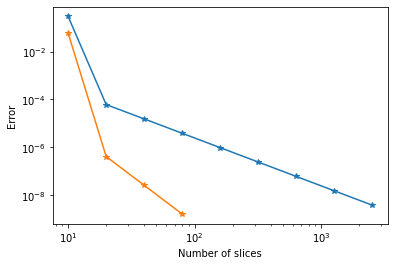

In [ ]:
print("To achieve an accuracy of",tolerance, " N = ",N_trap[-1], "slices are required with the trapezoidal rule.  The final integral value is: ",I_trap[-1])
print("To achieve an accuracy of",tolerance, " N = ",N_simpson[-1], "slices are required with the Simpson's rule.  The final integral value is: ",I_simpson[-1])
plt.loglog(N_trap[1:],tol_trap[1:],'*-') 
plt.loglog(N_simpson[1:],tol_simpson[1:],'*-') #plot the results
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.show()

##B

When you are convinced your program is working, extend it further to make a graph of $E\left(x\right)$ as a function of $x$ from $0\leq x \leq 10$.  Make sure each integral is calculated with an accuracy of $10^{-8}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables for the start and end of the integration bounds, along with the specified tolerance and number of slices in iteration 1.

In [ ]:
x_init = 0.0
x_space = 0.1
x_final = 5.0
tolerance = 1.0e-8
N_init = 10

Function to be calculated

In [ ]:
def f(x):
  return np.exp(-1*x**2)

Function for performing iterative simpson integration

In [ ]:
def iterative_simpson(a,b):
  '''
  Iterative Simpson's alogrithm.  
  Inputs: 
  a: float, start position
  b: float, end position
  calculates on pre-defined function f(x)
  returns: float, integral
  '''

  I_simpson = np.array([0.0])
  N_simpson = [N_init/2]
  tol_simpson = [10*tolerance]
  i = 0
  while tol_simpson[i]>tolerance:
    i += 1
    N_simpson.append(int(N_simpson[i-1]*2))
    h = (b-a) / N_simpson[i]
    x = np.linspace(a,b,N_simpson[i]+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
    y = f(x)
    integrand = y[0] + y[-1] #add the first and last elements
    for j in range(1,N_simpson[i]):
      if j%2 == 1: 
        integrand += 4 * y[j]
      if j%2 == 0:
        integrand += 2 * y[j]
    integrand *= h/3.0
    I_simpson=np.append(I_simpson,integrand)
    tol_simpson.append(1.0/15.0*np.abs(I_simpson[i]-I_simpson[i-1]))
  return I_simpson[-1]

Iterative over values of x from x_init to x_final.  Plot the results

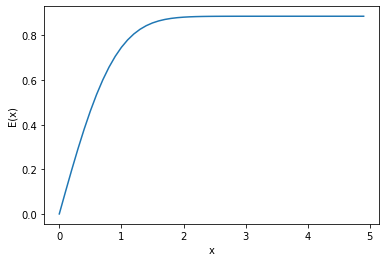

In [ ]:
N_points =int((x_final-x_init)/x_space)
xvals = np.arange(x_init,x_final,x_space)
yvals = np.zeros(N_points)
for b in range(N_points):
  yvals[b]=iterative_simpson(x_init,xvals[b])

plt.plot(xvals,yvals)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.show()

# Grading (50 points)
## Part A:
* 10 points: Is your program easy to read, with well defined user names and comments?
* 10 points: Does your program produce the correct results for both the iterative Simpson's and trapezoidal rules? 
* 5 points: Did you produce a plot that is labeled? Your plot should be labeled on the x and y axis, and have a legend or way of differentiating the Simpsons and trapezoidal rules

## Part B:
* 10 points: Is your program easy to read, with well defined user names and comments?
* 10 points: Does your program produce the correct results? 
* 5 points: Did you produce a plot that is correct?